<a href="https://colab.research.google.com/github/kafikewu/Pattern-Mining/blob/master/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
treshold = 0.05
dataset = []
transaction_counts = Counter()
with open("/content/drive/MyDrive/CSE477 Project/chess.dat") as f:
  for line in f:
    dataline = [int(i) for i in line.split(' ')[:-1]] ## Due to the last position having \n
    transaction_counts += Counter(dataline)
    dataset.append(dataline)
    print(dataline)
# print(len(dataset))
transaction_counts = sorted(transaction_counts.items(), key= lambda x: x[1])
transaction_counts = map(lambda x: (x[0],x[1]/len(dataset)), transaction_counts )
transaction_counts = sorted([i[0] for i in list(filter(lambda x: True if x[1] <= treshold else False, transaction_counts))], key=lambda x: x)
transaction_counts
for index, value in enumerate(dataset):
    dataset[index] = list(filter(lambda x: False if x in transaction_counts else True, dataset[index]))

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
transactionencoder = TransactionEncoder()
arr = transactionencoder.fit_transform(dataset)
df = pd.DataFrame(data=arr, columns=[str(i) for i in transactionencoder.columns_]) ## After fit_transform, the transactionencoder automatically generates the columns

In [ ]:
# https://stackoverflow.com/questions/51528769/how-to-implement-fpgrowth-algorithm-in-python

In [ ]:
df.to_csv('/content/drive/MyDrive/CSE477 Project/chessCleaned(0.5).csv')

In [ ]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.4MB 13.2MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
Apriori_dataframe = pd.read_csv('/content/drive/MyDrive/CSE477 Project/Chess_Apriori.csv')
Apriori_dataframe.pop('Unnamed: 0')
Fp_dataframe = pd.read_csv('/content/drive/MyDrive/CSE477 Project/Chess_Fp.csv')
Fp_dataframe.pop('Unnamed: 0')

0      0
1      1
2      2
3      3
4      4
      ..
65    65
66    66
67    67
68    68
69    69
Name: Unnamed: 0, Length: 70, dtype: int64

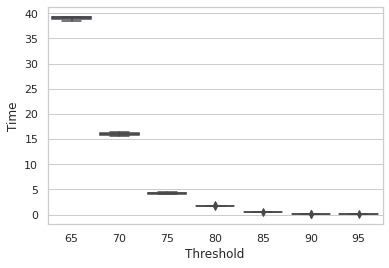

In [ ]:
sns.set_theme(style="whitegrid")
Apriori_dataframe = Apriori_dataframe.rename(columns= {'Accuracy': 'Threshold'})
ax = sns.boxplot(x="Threshold", y="Time", data=Apriori_dataframe)
figure = ax.get_figure()
figure.savefig("/content/drive/MyDrive/CSE477 Project/Chess_Apriori.png")

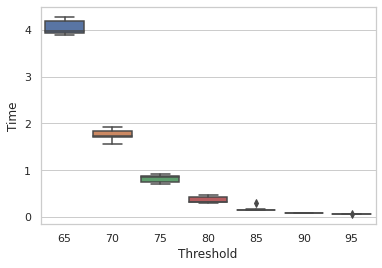

In [ ]:
sns.set_theme(style="whitegrid")
Fp_dataframe = Fp_dataframe.rename(columns= {'Accuracy': 'Threshold'})
ax = sns.boxplot(x="Threshold", y="Time", data=Fp_dataframe)
figure = ax.get_figure()
figure.savefig("/content/drive/MyDrive/CSE477 Project/Chess_Fp.png")

    Threshold      Time  Number_of_patterns  Algorithm
0          65  4.233787              111239  Fp-Growth
1          65  3.942816              111239  Fp-Growth
2          65  3.893556              111239  Fp-Growth
3          65  4.205117              111239  Fp-Growth
4          65  3.919481              111239  Fp-Growth
..        ...       ...                 ...        ...
65         95  0.061749                  77  Fp-Growth
66         95  0.059206                  77  Fp-Growth
67         95  0.058429                  77  Fp-Growth
68         95  0.059870                  77  Fp-Growth
69         95  0.069432                  77  Fp-Growth

[70 rows x 4 columns]


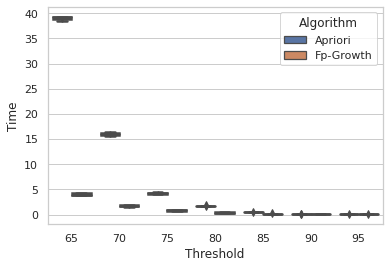

In [ ]:
import seaborn as sns
Apriori_dataframe = Apriori_dataframe.append(Fp_dataframe)
Apriori_dataframe = Apriori_dataframe.rename(columns= {'Accuracy': 'Threshold'})
ax = sns.boxplot(x="Threshold", y="Time", hue="Algorithm",
                 data=Apriori_dataframe, linewidth=2.5)
figure = ax.get_figure()
figure.savefig("/content/drive/MyDrive/CSE477 Project/Chess_Comparison.png")
print(Fp_dataframe)